In [ ]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np
from functools import partial
from google.colab.patches import cv2_imshow
import os


In [ ]:
def mse_cost(block1, block2):
    error = np.mean((block1 - block2)**2)
    return error

def f_max_dis(preframe, currentframe, window, cost_function):
    error = np.inf
    min_dist = 0
    distance = []
    for i in range(window, height-window):
      temp1 = []
      for j in range(window, width-window):
        block1 = preframe[i-window:i+window+1, j-window:j+window+1]
        for k in range(window, currentframe.shape[1]-window):
          block2 = currentframe[i-window:i+window+1, window+k:window+k+1]
          
          temp = cost_function(block1, block2)
          if temp < error:
              error = temp
              min_dist = k
        temp1.append(min_dist)
      distance.append(temp1)
    numpy_array =  np.abs(np.array(distance))
    unique_elements, counts_elements = np.unique(numpy_array, return_counts=True)
    return (unique_elements, counts_elements)

def whole_search(preframe, currentframe, location, window, cost_function, search_distance=None):
    error = np.inf
    min_index = location
    for i in range(window, currentframe.shape[1]-window):
      block1 = preframe[location[0]-window:location[0]+window+1, location[1]-window:location[1]+window+1]
      block2 = currentframe[location[0]-window:location[0]+window+1, window+i:window+i+1]
      temp = cost_function(block1, block2)
      if temp < error:
          error = temp
          min_index = [location[0], location[1]+i]
    return min_index

def profunction(preframe, currentframe, location, window, cost_function, search_distance):
    error = np.inf
    max_search = min(location[1]+search_distance, currentframe.shape[1]-window)-location[1]
    min_index = location
    for i in range(0, max_search):
      block1 = preframe[location[0]-window:location[0]+window+1, location[1]-window:location[1]+window+1]
      block2 = currentframe[location[0]-window:location[0]+window+1, location[1]-window+i:location[1]+window+i+1]
      temp = cost_function(block1, block2)
      if temp < error:
          error = temp
          min_index = [location[0], location[1]+i]
    return min_index

def search_helper(searching_alog, left, right, window, cost_function, max_search): 
  all_motion = []
  global min_location
  for i in range(window, height-window):
      temp = []
      for j in range(window, width-window):
        location = np.array([i, j])
        min_location = []
        temp.append(location - searching_alog(left, right, location, window, cost_function, max_search))
      all_motion.append(temp)
  return np.array(all_motion)              

In [ ]:
# Here we are reading the file and converting into the YCbCr format
img1 = cv2.imread("view1.png")  
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2YCR_CB)[:,:,0]
img2 = cv2.imread("view5.png")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2YCR_CB)[:,:,0]

## **Constrained**

**SSD window size 3**

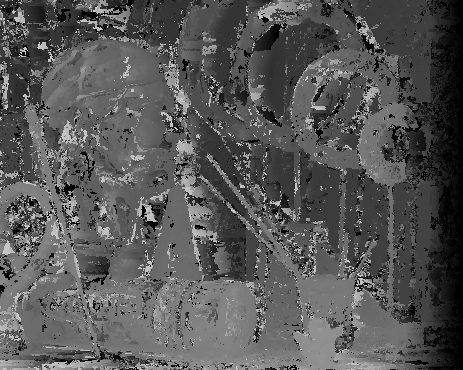

In [ ]:
window = 3
window = window//2
padding = window
top, bottom, left, right =(padding, padding, padding, padding) 
image1 = cv2.copyMakeBorder(img1, top, bottom, left, right, cv2.BORDER_REPLICATE)
image2 = cv2.copyMakeBorder(img2, top, bottom, left, right, cv2.BORDER_REPLICATE)
height, width = image1.shape
max_search = 100
mse_img = search_helper(profunction, image2, image1, window, mse_cost, max_search)
mse_image = mse_img[:,:,1]
cv2_imshow(np.abs(mse_image)*2)

**SSD window size 5**

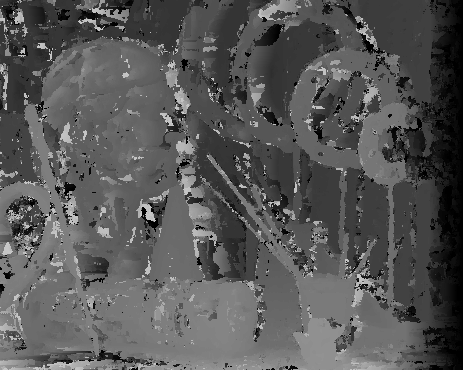

In [ ]:
window = 5
window = window//2
padding = window
top, bottom, left, right =(padding, padding, padding, padding) 
image1 = cv2.copyMakeBorder(img1, top, bottom, left, right, cv2.BORDER_REPLICATE)
image2 = cv2.copyMakeBorder(img2, top, bottom, left, right, cv2.BORDER_REPLICATE)
height, width = image1.shape
max_search = 100
mse_img = search_helper(profunction, image2, image1, window, mse_cost, max_search)
mse_image = mse_img[:,:,1]
cv2_imshow(np.abs(mse_image)*2)

**SSD window size 7**

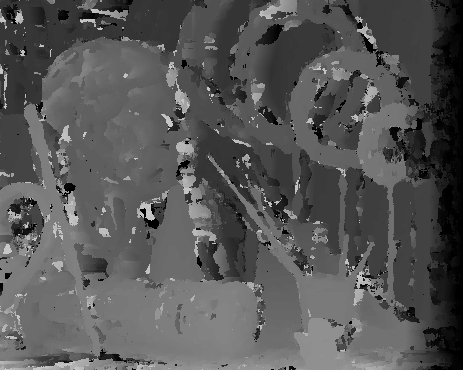

In [ ]:
window = 7
window = window//2
padding = window
top, bottom, left, right =(padding, padding, padding, padding) 
image1 = cv2.copyMakeBorder(img1, top, bottom, left, right, cv2.BORDER_REPLICATE)
image2 = cv2.copyMakeBorder(img2, top, bottom, left, right, cv2.BORDER_REPLICATE)
height, width = image1.shape
max_search = 100
mse_img = search_helper(profunction, image2, image1, window, mse_cost, max_search)
mse_image = mse_img[:,:,1]
cv2_imshow(np.abs(mse_image)*2)

**SSD window size 9**

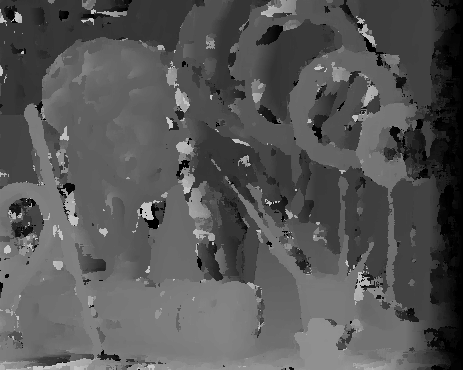

In [ ]:
window = 9
window = window//2
padding = window
top, bottom, left, right =(padding, padding, padding, padding) 
image1 = cv2.copyMakeBorder(img1, top, bottom, left, right, cv2.BORDER_REPLICATE)
image2 = cv2.copyMakeBorder(img2, top, bottom, left, right, cv2.BORDER_REPLICATE)
height, width = image1.shape
max_search = 100
mse_img = search_helper(profunction, image2, image1, window, mse_cost, max_search)
mse_image = mse_img[:,:,1]
cv2_imshow(np.abs(mse_image)*2)

**zncc window size 3**

<ipython-input-13-ca53c5d29fa0>:26: RuntimeWarning: invalid value encountered in true_divide
  zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)


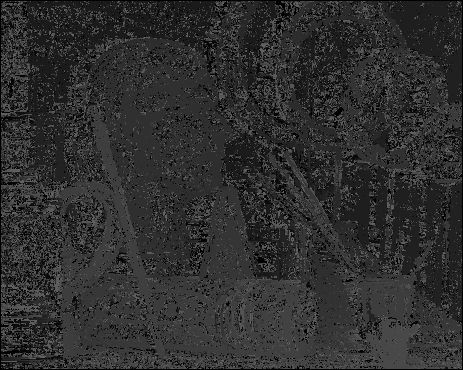

In [13]:
window_size = 3
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = 100
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)


disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1

        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue

            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
                
        disparity_map[y, x] = best_match

cv2_imshow(disparity_map)

**zncc window size 5**

<ipython-input-12-0ddfe0634ac7>:25: RuntimeWarning: invalid value encountered in true_divide
  zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)


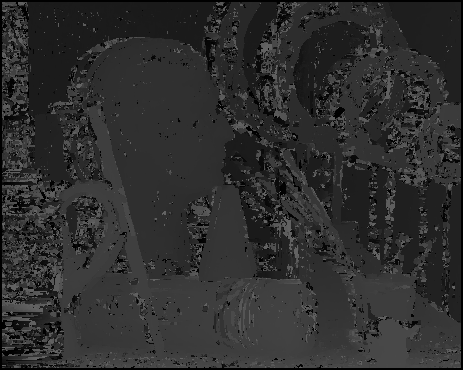

In [12]:
window_size = 5
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = 100
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1

        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue

            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
                
        disparity_map[y, x] = best_match

cv2_imshow(disparity_map)

**zncc window size 7**

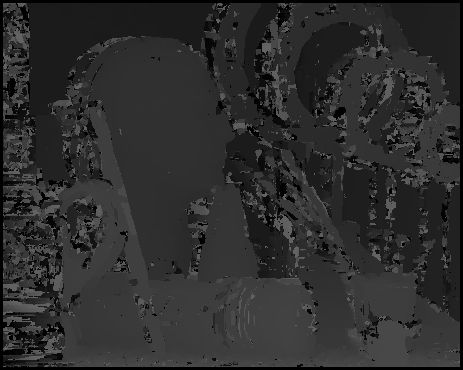

In [14]:
window_size = 7
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = 100
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1

        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue

            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
                
        disparity_map[y, x] = best_match

cv2_imshow(disparity_map)

**zncc window size 9**

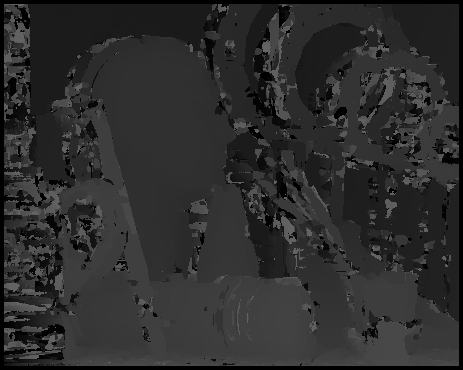

In [15]:
window_size = 9
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = 100
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1

        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue

            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
                
        disparity_map[y, x] = best_match

cv2_imshow(disparity_map)

**Constrained census**

In [ ]:
def census_disp(window_size, gray_left, gray_right, max_disp = None):
  if max_disp is None:
    max_disp = gray_left.shape[1]-window_size//2
  census_left = np.zeros_like(gray_left)
  for y in range(window_size//2, gray_left.shape[0]-window_size//2):
      for x in range(window_size//2, gray_left.shape[1]-window_size//2):
          window = gray_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
          census = np.zeros_like(window)
          census[window < gray_left[y,x]] = 1
          census_left[y,x] = np.packbits(census.flatten())[0]
  disparity = np.zeros_like(gray_left)
  for y in range(window_size//2, gray_left.shape[0]-window_size//2):
      for x in range(window_size//2, gray_left.shape[1]-window_size//2):
          min_hamming = float('inf')
          best_disparity = 0
          window_left = census_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
          for d in range(0, max_disp):
              window_right = gray_right[y-window_size//2:y+window_size//2+1, x+d-window_size//2:x+d+window_size//2+1]
              census = np.zeros_like(window_right)
              census[window_right < gray_left[y,x]] = 1
              hamming = np.count_nonzero(np.unpackbits(window_left^np.packbits(census.flatten())[0]))
              if hamming < min_hamming:
                  min_hamming = hamming
                  best_disparity = d
          disparity[y,x] = best_disparity
  disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
  return disparity_normalized

In [ ]:
img_left = cv2.imread('view1.png')
img_right = cv2.imread('view5.png')
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

**Census Transform of window size 3**

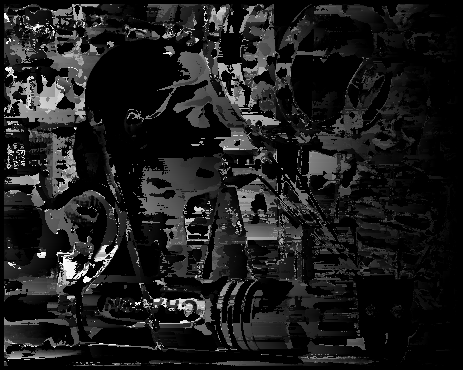

In [ ]:
window_size = 3
max_disp = 70
disparity_normalized = census_disp(window_size, gray_left, gray_right)
cv2_imshow(disparity_normalized)

**Census Transform of window size 5**

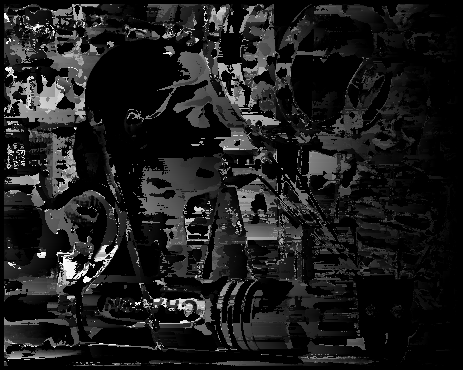

In [ ]:
window_size = 5
max_disp = 70
disparity_normalized = census_disp(window_size, gray_left, gray_right)
cv2_imshow(disparity_normalized)

**Census Transform of window size 7**

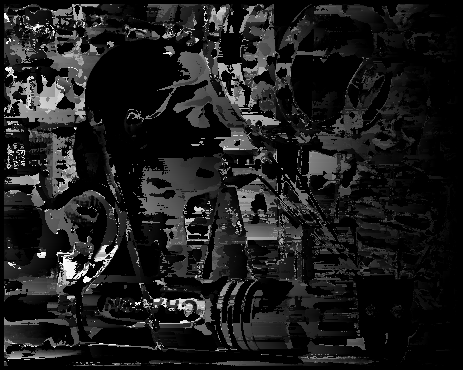

In [ ]:
window_size = 7
max_disp = 70
disparity_normalized = census_disp(window_size, gray_left, gray_right)
cv2_imshow(disparity_normalized)

**Census Transform for window size 9**

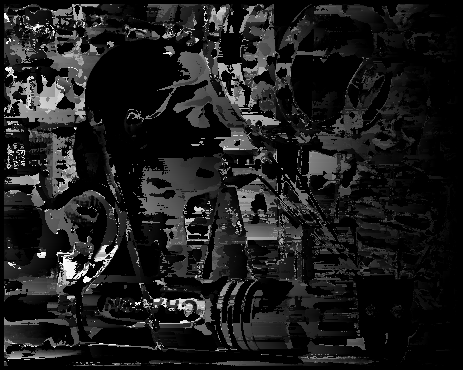

In [ ]:
window_size = 9
max_disp = 70
disparity_normalized = census_disp(window_size, gray_left, gray_right)
cv2_imshow(disparity_normalized)

# **Unconstrained**

**SSD window size 3**

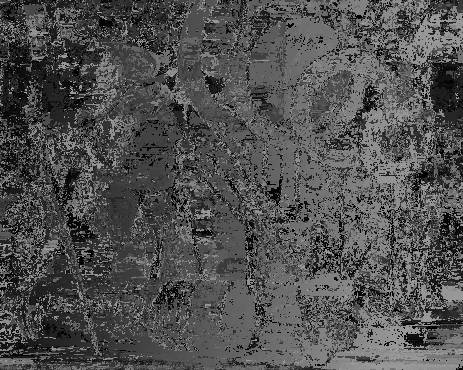

In [ ]:
window=3
whole_img = search_helper(whole_search, image2, image1, window, mse_cost, max_search)
whole_mse_image = whole_img[:,:,1]
cv2_imshow(np.abs(whole_mse_image)/3)


**SSD window size 5**

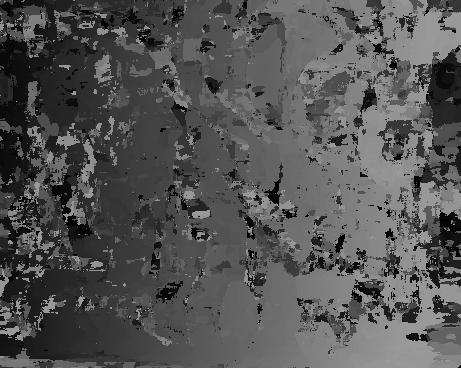

In [ ]:
window=5
whole_img = search_helper(whole_search, image2, image1, window, mse_cost, max_search)
whole_mse_image = whole_img[:,:,1]
cv2_imshow(np.abs(whole_mse_image)/3)


**SSD window size 7**

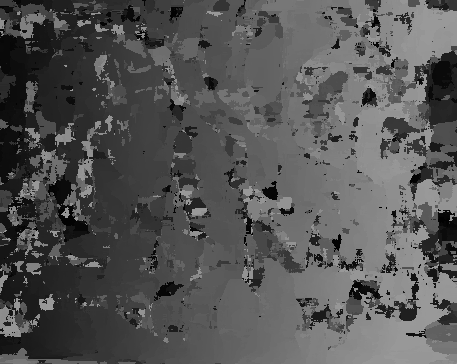

In [ ]:
window=7
whole_img = search_helper(whole_search, image2, image1, window, mse_cost, max_search)
whole_mse_image = whole_img[:,:,1]
cv2_imshow(np.abs(whole_mse_image)/3)


**SSD window size 9**

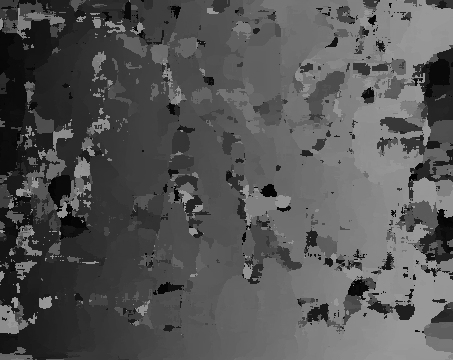

In [ ]:
window=9
whole_img = search_helper(whole_search, image2, image1, window, mse_cost, max_search)
whole_mse_image = whole_img[:,:,1]
cv2_imshow(np.abs(whole_mse_image)/3)

**zncc window size 3**

<ipython-input-19-a863aa460b66>:48: RuntimeWarning: invalid value encountered in true_divide
  zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)


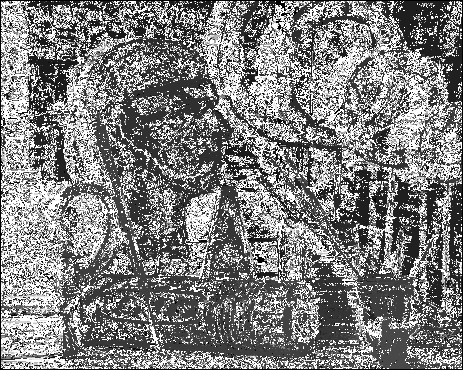

In [ ]:
window_size = 3
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = left_img.shape[1]
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1
        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue
            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
        disparity_map[y, x] = best_match
        
cv2_imshow(disparity_map)

**zncc window size 5**

<ipython-input-2-5bd040b4a1f4>:47: RuntimeWarning: invalid value encountered in true_divide
  zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)


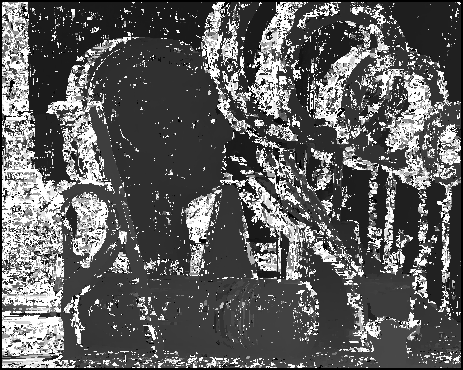

In [ ]:
window_size = 5
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = left_img.shape[1]
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1
        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue
            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
        disparity_map[y, x] = best_match
        
cv2_imshow(disparity_map)

**zncc window size 7**

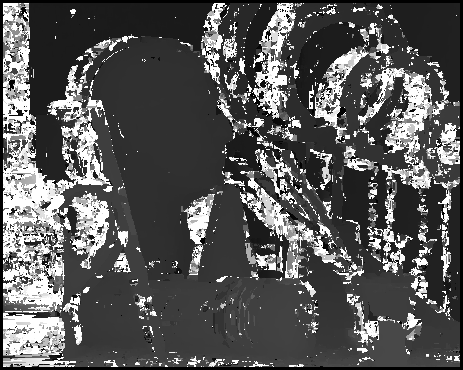

In [ ]:
window_size = 7
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = left_img.shape[1]
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1
        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue
            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
        disparity_map[y, x] = best_match
        
cv2_imshow(disparity_map)

**zncc of window size 9**

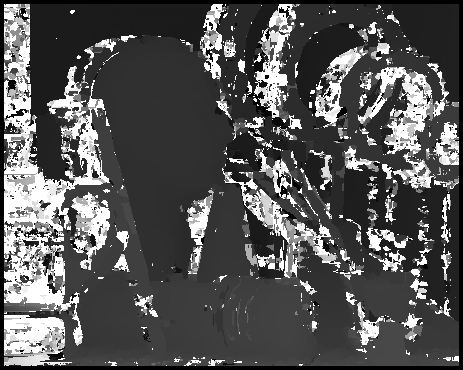

In [ ]:
window_size = 9
half_window_size = window_size // 2
left_img = cv2.imread('view1.png')
right_img = cv2.imread('view5.png')
min_disp = 0
max_disp = left_img.shape[1]
left_gray = cv2.cvtColor(left_img, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_img, cv2.COLOR_BGR2GRAY)

disparity_map = np.zeros_like(left_gray, dtype=np.float32)
for y in range(half_window_size, left_gray.shape[0] - half_window_size):
    for x in range(half_window_size, left_gray.shape[1] - half_window_size):
        best_match = None
        best_match_score = -1
        for disp in range(min_disp, max_disp):
            left_window = left_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size : x + half_window_size + 1]
            right_window = right_gray[y - half_window_size : y + half_window_size + 1, x - half_window_size - disp : x + half_window_size + 1 - disp]
            if left_window.shape != (window_size, window_size) or right_window.shape != (window_size, window_size):
                continue
            left_mean, left_std = cv2.meanStdDev(left_window)
            right_mean, right_std = cv2.meanStdDev(right_window)
            zncc_score = np.sum((left_window - left_mean) * (right_window - right_mean)) / (left_std * right_std * window_size * window_size)
            if zncc_score > best_match_score:
                best_match = disp
                best_match_score = zncc_score
        disparity_map[y, x] = best_match
        
cv2_imshow(disparity_map)

**Census Transform window size 3**

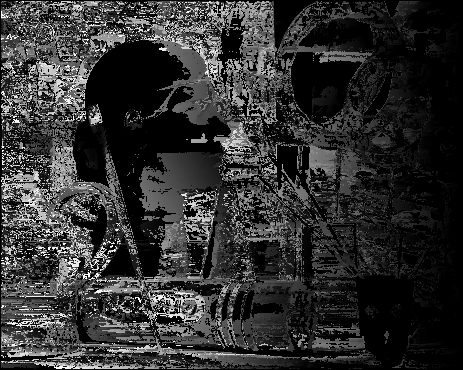

In [ ]:
img_left = cv2.imread('view1.png')
img_right = cv2.imread('view5.png')
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
window_size = 3

census_left = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        window = gray_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        census = np.zeros_like(window)
        census[window < gray_left[y,x]] = 1
        census_left[y,x] = np.packbits(census.flatten())[0]
disparity = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        min_hamming = float('inf')
        best_disparity = 0
        window_left = census_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        for d in range(0, gray_left.shape[1]-window_size//2-x):
            window_right = gray_right[y-window_size//2:y+window_size//2+1, x+d-window_size//2:x+d+window_size//2+1]
            census = np.zeros_like(window_right)
            census[window_right < gray_left[y,x]] = 1
            hamming = np.count_nonzero(np.unpackbits(window_left^np.packbits(census.flatten())[0]))
            if hamming < min_hamming:
                min_hamming = hamming
                best_disparity = d
        disparity[y,x] = best_disparity
disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

cv2_imshow(disparity_normalized)

**Census Transform window size 5**

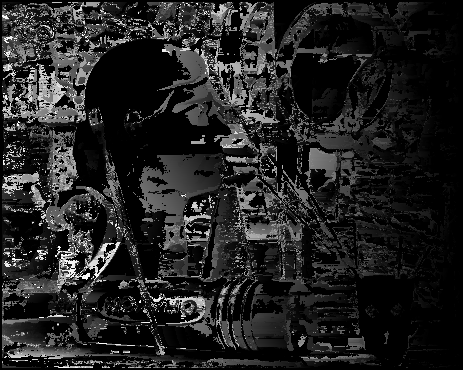

In [ ]:
img_left = cv2.imread('view1.png')
img_right = cv2.imread('view5.png')
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
window_size = 5

census_left = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        window = gray_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        census = np.zeros_like(window)
        census[window < gray_left[y,x]] = 1
        census_left[y,x] = np.packbits(census.flatten())[0]
disparity = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        min_hamming = float('inf')
        best_disparity = 0
        window_left = census_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        for d in range(0, gray_left.shape[1]-window_size//2-x):
            window_right = gray_right[y-window_size//2:y+window_size//2+1, x+d-window_size//2:x+d+window_size//2+1]
            census = np.zeros_like(window_right)
            census[window_right < gray_left[y,x]] = 1
            hamming = np.count_nonzero(np.unpackbits(window_left^np.packbits(census.flatten())[0]))
            if hamming < min_hamming:
                min_hamming = hamming
                best_disparity = d
        disparity[y,x] = best_disparity
disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

cv2_imshow(disparity_normalized)

**Census Transform of window size 7**

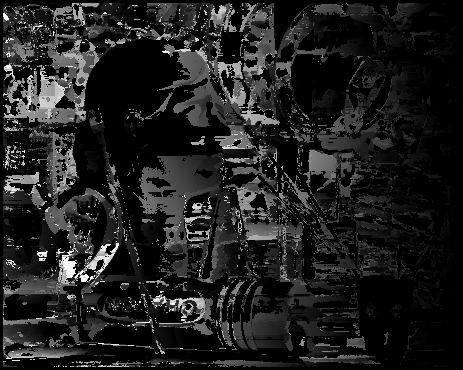

In [ ]:
img_left = cv2.imread('view1.png')
img_right = cv2.imread('view5.png')
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
window_size = 7

census_left = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        window = gray_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        census = np.zeros_like(window)
        census[window < gray_left[y,x]] = 1
        census_left[y,x] = np.packbits(census.flatten())[0]
disparity = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        min_hamming = float('inf')
        best_disparity = 0
        window_left = census_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        for d in range(0, gray_left.shape[1]-window_size//2-x):
            window_right = gray_right[y-window_size//2:y+window_size//2+1, x+d-window_size//2:x+d+window_size//2+1]
            census = np.zeros_like(window_right)
            census[window_right < gray_left[y,x]] = 1
            hamming = np.count_nonzero(np.unpackbits(window_left^np.packbits(census.flatten())[0]))
            if hamming < min_hamming:
                min_hamming = hamming
                best_disparity = d
        disparity[y,x] = best_disparity
disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

cv2_imshow(disparity_normalized)

**Census Transform of window size 9**

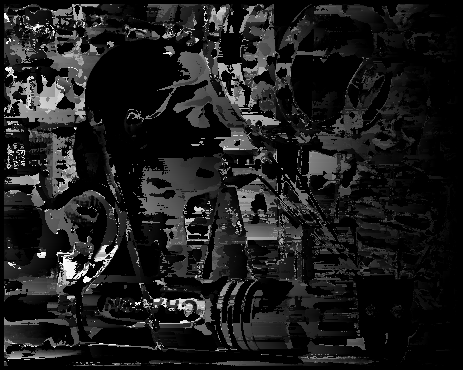

In [ ]:
img_left = cv2.imread('view1.png')
img_right = cv2.imread('view5.png')
gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
window_size = 9

census_left = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        window = gray_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        census = np.zeros_like(window)
        census[window < gray_left[y,x]] = 1
        census_left[y,x] = np.packbits(census.flatten())[0]
disparity = np.zeros_like(gray_left)
for y in range(window_size//2, gray_left.shape[0]-window_size//2):
    for x in range(window_size//2, gray_left.shape[1]-window_size//2):
        min_hamming = float('inf')
        best_disparity = 0
        window_left = census_left[y-window_size//2:y+window_size//2+1, x-window_size//2:x+window_size//2+1]
        for d in range(0, gray_left.shape[1]-window_size//2-x):
            window_right = gray_right[y-window_size//2:y+window_size//2+1, x+d-window_size//2:x+d+window_size//2+1]
            census = np.zeros_like(window_right)
            census[window_right < gray_left[y,x]] = 1
            hamming = np.count_nonzero(np.unpackbits(window_left^np.packbits(census.flatten())[0]))
            if hamming < min_hamming:
                min_hamming = hamming
                best_disparity = d
        disparity[y,x] = best_disparity
disparity_normalized = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

cv2_imshow(disparity_normalized)